In [13]:
###Imports:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 8
import scipy.special as sp
import scipy.optimize
import scipy.stats as stat

In [14]:
###Read the data files and delete the second column of numbers:

data1 = np.loadtxt("sifted_data1.data", dtype = int)
data1 = np.delete(data1, 1, 1)
print (f"{len(data1)} events were recorded in the 1st dataset.")
data2 = np.loadtxt("sifted_data2.data", dtype = int)
data2 = np.delete(data2, 1, 1)
print (f"{len(data2)} events were recorded in the 2nd dataset.")

3000 events were recorded in the 1st dataset.
3240 events were recorded in the 2nd dataset.


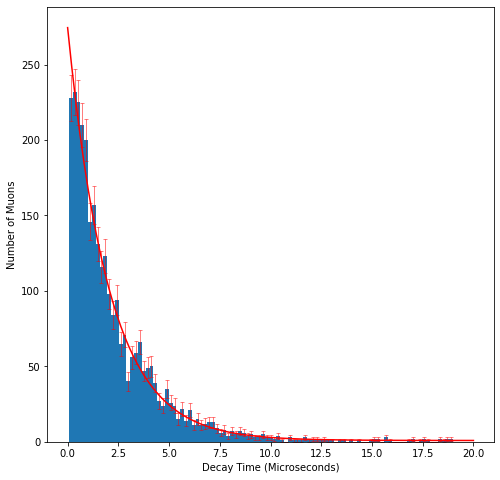

The parameter A (Initial Munons) is equal to 273.61482681683424 ± 7.790967395828662
The parameter B (Background) is equal to 0.8717365337644842 ± 0.21722352477337598
Tau is equal to 2.0386676678123914 ± 0.048081341753963655 microseconds


In [15]:
###Parameter Calculation, Error, and Graph for Data Set 1:

#Making a histogram of the data

fig1, ax1 = plt.subplots()
ax1.hist(data1/1000,bins=100)
y1, binEdges1 = np.histogram(data1/1000, bins=100)
bincenters1 = 0.5*(binEdges1[1:] + binEdges1[:-1])
data_error1 = np.sqrt(y1)
ax1.errorbar(bincenters1, y1, yerr = data_error1, xerr = None, ecolor = 'red', elinewidth = 0.5, capsize = 2, markeredgewidth = 0.5, linestyle = 'None')

#Fitting the data 

data_error1 = data_error1[data_error1 != 0]
bincenters1 = bincenters1[y1 != 0]
y1 = y1[y1 != 0]

t1 = np.linspace(0, 20, num = 100)
fitparams1, points1 = scipy.optimize.curve_fit(lambda t, a, b, c: a*np.exp(-(1/c)*t)+ b, bincenters1, y1, p0 = (250, 1, 2), absolute_sigma = True, sigma = data_error1)
ax1.plot(t1, fitparams1[0]*np.exp(-(1/fitparams1[2])*t1) + fitparams1[1], color = 'red', label= None)
variance_matrix1 = np.diag(points1)
a_uncert1 = np.sqrt(variance_matrix1[0])
b_uncert1 = np.sqrt(variance_matrix1[1])
tau_uncert1 = np.sqrt(variance_matrix1[2])

#Graph Formatting and plt.show()

plt.xlabel("Decay Time (Microseconds)")
plt.ylabel ("Number of Muons")
plt.show()

#Info Dump
print (f"The parameter A (Initial Munons) is equal to {fitparams1[0]} ± {a_uncert1}")
print (f"The parameter B (Background) is equal to {fitparams1[1]} ± {b_uncert1}")
print (f"Tau is equal to {fitparams1[2]} ± {tau_uncert1} microseconds")

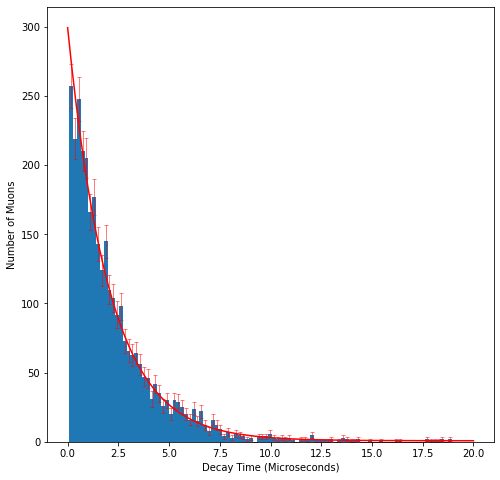

The parameter A (Initial Munons) is equal to 298.65379102804576 ± 7.790967395828662
The parameter B (Background) is equal to 0.7590410134607852 ± 0.21722352477337598
Tau is equal to 2.049079165433508 ± 0.048081341753963655 microseconds


In [16]:
###Parameter Calculation, Error, and Graph for Data Set 2:

#Making a histogram of the data

fig2, ax2 = plt.subplots()
ax2.hist(data2/1000,bins=100)
y2, binEdges2 = np.histogram(data2/1000, bins=100)
bincenters2 = 0.5*(binEdges2[1:] + binEdges2[:-1])
data_error2 = np.sqrt(y2)
ax2.errorbar(bincenters2, y2, yerr = data_error2, xerr = None, ecolor = 'red', elinewidth = 0.5, capsize = 2, markeredgewidth = 0.5, linestyle = 'None')

#Fitting the data 

data_error2 = data_error2[data_error2 != 0]
bincenters2 = bincenters2[y2 != 0]
y2 = y2[y2 != 0]

t2 = np.linspace(0, 20, num = 100)
fitparams2, points2 = scipy.optimize.curve_fit(lambda t, a, b, c: a*np.exp(-(1/c)*t)+ b, bincenters2, y2, p0 = (250, 1, 2), absolute_sigma = True, sigma = data_error2)
ax2.plot(t2, fitparams2[0]*np.exp(-(1/fitparams2[2])*t2) + fitparams2[1], color = 'red', label= None)
variance_matrix2 = np.diag(points1)
a_uncert2 = np.sqrt(variance_matrix1[0])
b_uncert2 = np.sqrt(variance_matrix1[1])
tau_uncert2 = np.sqrt(variance_matrix1[2])

#Graph Formatting and plt.show()

plt.xlabel("Decay Time (Microseconds)")
plt.ylabel ("Number of Muons")
plt.show()

#Info Dump
print (f"The parameter A (Initial Munons) is equal to {fitparams2[0]} ± {a_uncert2}")
print (f"The parameter B (Background) is equal to {fitparams2[1]} ± {b_uncert2}")
print (f"Tau is equal to {fitparams2[2]} ± {tau_uncert2} microseconds")

In [23]:
### Average Tau from both datasets 

tau_av = (fitparams1[2] + fitparams2[2])/2
tau_av_uncert = np.sqrt(tau_uncert1**2+tau_uncert2**2)/2
print (f"The average of the Tau values from both datasets is {tau_av} ± {tau_av_uncert} microseconds.")

The average of the Tau values from both datasets is 2.04387341662295 ± 0.033998642802775585 microseconds.


In [24]:
### Chi-Squared and P-test for Data Set 1

def fit(A, B, C, t):
    return A*np.exp(-(1/C)*t) + B
fitline1 = fit(fitparams1[0], fitparams1[1], fitparams1[2], bincenters1)
chisq1 = sum((y1 - fitline1)**2 / data_error1**2)
dof1 = len(y1) - len(fitparams1)
chisq_reduced1 = chisq1/float(dof1)
p1 = 1. - stat.chi2.cdf(chisq1, df = dof1)

# Printing everything out
print (f"Chi-Squared = {chisq1}")
upper_chi_bound1 = dof1 + np.sqrt(2*dof1)
lower_chi_bound1 = dof1 - np.sqrt(2*dof1)
if chisq1 <= lower_chi_bound1 and upper_chi_bound1 >= chisq1:
    print("Chi-Squared value is within expected range.")
else:
    print ("Chi-Squared value is not within expected range.")
print (f"\nReduced Chi-Squared = {chisq_reduced1}")
print (f"P-test value = {p1} w/ dof = {dof1}")

Chi-Squared = 70.03960576517353
Chi-Squared value is within expected range.

Reduced Chi-Squared = 0.8438506718695606
P-test value = 0.8440294265385903 w/ dof = 83


In [25]:
### Chi-Squared and P-test for Data Set 2

def fit(A, B, C, t):
    return A*np.exp(-(1/C)*t) + B
fitline2 = fit(fitparams2[0], fitparams2[1], fitparams2[2], bincenters2)
chisq2 = sum((y2 - fitline2)**2 / data_error2**2)
dof2 = len(y2) - len(fitparams2)
chisq_reduced2 = chisq2/float(dof2)
p2 = 1. - stat.chi2.cdf(chisq2, df = dof2)

# Printing everything out
print (f"Chi-Squared = {chisq2}")
upper_chi_bound2 = dof2 + np.sqrt(2*dof2)
lower_chi_bound2 = dof2 - np.sqrt(2*dof2)
if chisq2 <= lower_chi_bound2 and upper_chi_bound2 >= chisq2:
    print("Chi-Squared value is within expected range.")
else:
    print ("Chi-Squared value is not within expected range.")
print (f"\nReduced Chi-Squared = {chisq_reduced1}")
print (f"P-test value = {p2} w/ dof = {dof2}")

Chi-Squared = 64.58159211056487
Chi-Squared value is within expected range.

Reduced Chi-Squared = 0.8438506718695606
P-test value = 0.8950414083286694 w/ dof = 80


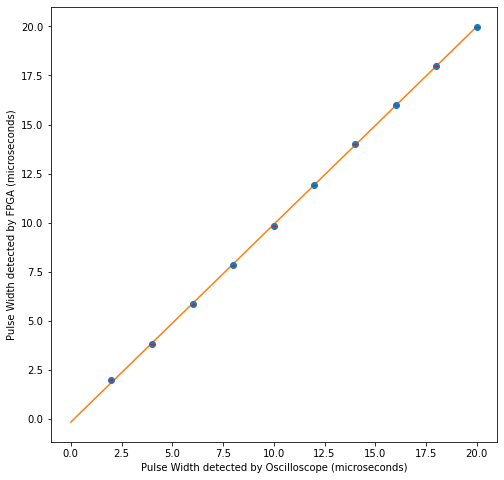

Osc: [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
FPGA: [ 2.002  3.83   5.838  7.828  9.838 11.918 14.01  16.    17.982 19.974]
FPGA Error: [0.00843274 0.00843274 0.00843274 0.00843274 0.00843274 0.00843274
 0.00843274 0.00843274 0.00843274 0.00843274]


In [26]:
### FGPA FIT

# first column is osc data, second column is fgpa data
fpga_file = np.loadtxt("FPGA_data.txt", dtype = float)
#print(fpga_file)
#print(fpga_file[0])
#print(fpga_file[0,0])
osc = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20], dtype = float)
fpga = np.zeros(len(osc))
N = 10.
for i in range(len(osc)):
    for j in range(len(fpga_file)):
        if fpga_file[j, 0] == osc[i]:
            fpga[i] += fpga_file[j,1]
fpga = fpga * 1/N
fpga_variance = np.zeros(len(osc))
for i in range (len(osc)):
    for j in range (len(fpga_file)):
        if fpga_file[j, 0] == osc[i]:
            fpga_variance += (fpga[i]-fpga_file[j,1])**2
fpga_variance = fpga_variance * 1/(N-1)
fpga_stdev = np.sqrt(fpga_variance) / np.sqrt(N)

# Plot stuff

fig2, ax2 = plt.subplots()
ax2.scatter(osc, fpga, zorder = 2)
ax2.errorbar(osc, fpga, xerr = None, yerr = fpga_stdev, ecolor = 'red', elinewidth = 0.5, capsize = 2, markeredgewidth = 0.5, linestyle = 'None' )
m2, b2 = np.polyfit(osc, fpga, 1)
fitpoints = np.linspace(0, 20, num = 100)
ax2.plot(fitpoints, m2 * fitpoints + b2, zorder = 1)
plt.xlabel ("Pulse Width detected by Oscilloscope (microseconds)")
plt.ylabel ("Pulse Width detected by FPGA (microseconds)")
plt.show()
print (f"Osc: {osc}")
print (f"FPGA: {fpga}")
print (f"FPGA Error: {fpga_stdev}")



In [27]:
### Fermi Coupling Constant

hbar = 6.582119569e-25
mmue = 0.10566
c = 2.998e+8
tau = tau_av*1e-6
n_tau_uncert = tau_av_uncert*1e-6
fermi = np.sqrt((192 * np.pi**3 * hbar)/(tau * mmue**5))
fermi_uncert = np.sqrt((12 * np.pi**3 * hbar * n_tau_uncert**2)/(tau**3 * mmue**5))
print (f"The Reduced Fermi Coupling Constant is Equal to {fermi} ± {fermi_uncert} GeV^-2")

The Reduced Fermi Coupling Constant is Equal to 1.2065763086698385e-05 ± 5.0176733792713403e-08 GeV^-2
